
----- Training Weighted Avg Models for All Features -----

Weighted Avg Voting Ensemble (All Features) Metrics:
Accuracy: 0.9984221157524783
Precision: 0.9984272535743481
Recall: 0.9984221157524783
F1 Score: 0.9984234256790335


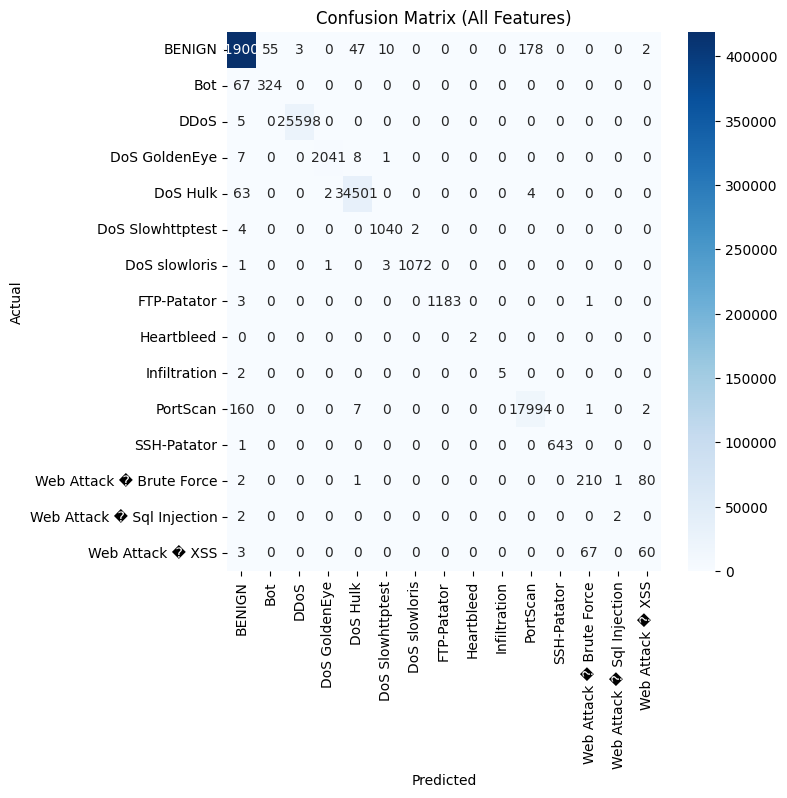


----- Training Weighted Avg Models for IG Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Weighted Avg Voting Ensemble (IG Top 5 Features) Metrics:
Accuracy: 0.9896049937261261
Precision: 0.9896378774406477
Recall: 0.9896049937261261
F1 Score: 0.9887439601184221


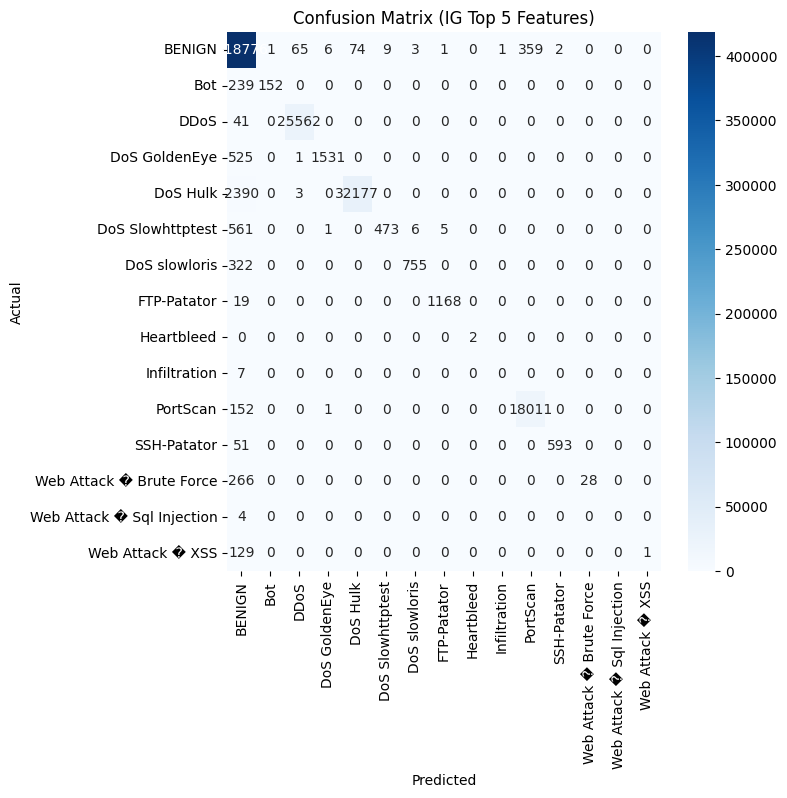


----- Training Weighted Avg Models for IG Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Weighted Avg Voting Ensemble (IG Top 10 Features) Metrics:
Accuracy: 0.9896941957250438
Precision: 0.9897337082203891
Recall: 0.9896941957250438
F1 Score: 0.9888478476401954


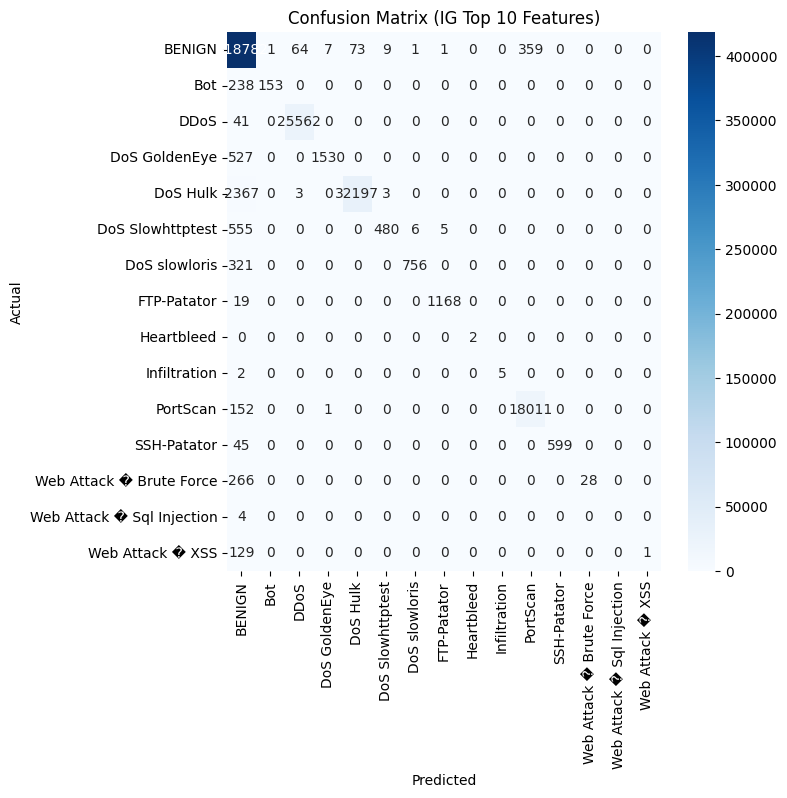


----- Training Weighted Avg Models for KBest Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Weighted Avg Voting Ensemble (KBest Top 5 Features) Metrics:
Accuracy: 0.9619384981951462
Precision: 0.9609240156886837
Recall: 0.9619384981951462
F1 Score: 0.9612936681587185


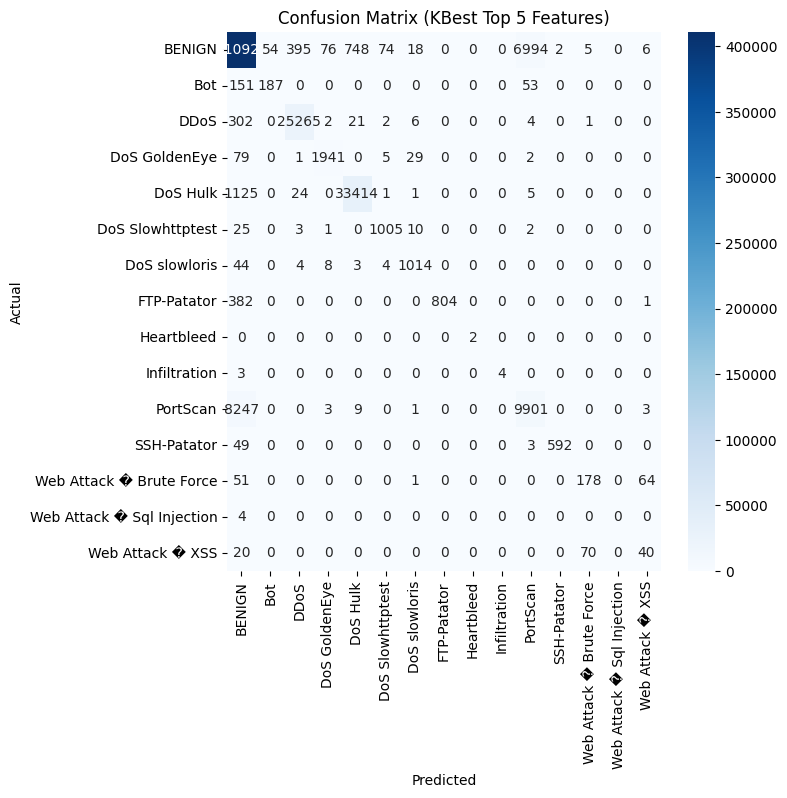


----- Training Weighted Avg Models for KBest Top 10 Features -----

Weighted Avg Voting Ensemble (KBest Top 10 Features) Metrics:
Accuracy: 0.9964894057759286
Precision: 0.9964025572644856
Recall: 0.9964894057759286
F1 Score: 0.9964153436230268


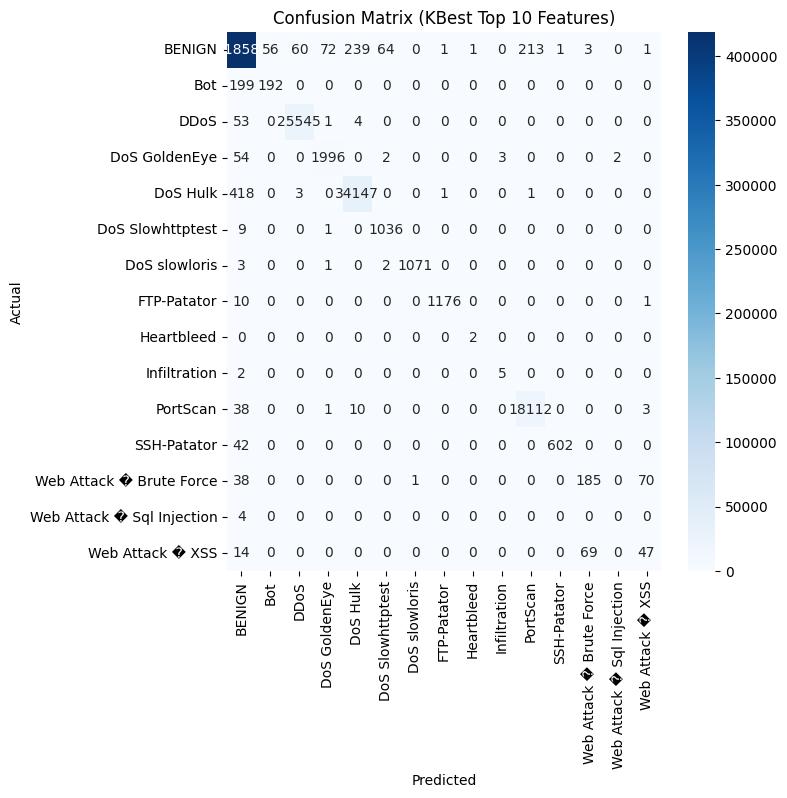

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import time
import numpy as np
import sys
sys.path.append('/home/ibibers/IDS Project/IDS-Machine-Learning-Techniques-')
from CICIDS2017 import data_preprocessing, evaluate_model, plot_confusion_matrix

# ---------------------------- Model Training and Evaluation ----------------------------
results = []
datasets, le = data_preprocessing()
for name, (X_tr, X_te, y_train , y_test) in datasets.items():
    print(f"\n----- Training Weighted Avg Models for {name} -----")

    start_time = time.time()

    model1 = DecisionTreeClassifier()
    model2 = KNeighborsClassifier(n_neighbors=5)
    model3 = RandomForestClassifier()

    model1.fit(X_tr, y_train)
    model2.fit(X_tr, y_train)
    model3.fit(X_tr, y_train)

    train_end_time = time.time()

    pred1 = model1.predict_proba(X_te)
    pred2 = model2.predict_proba(X_te)
    pred3 = model3.predict_proba(X_te)

    # Final prediction using Simple Average (Soft Voting)
    final_pred=((pred1 * 0.4 ) +(pred2*0.3)+(pred3*0.3))

    final_class_pred_enc = np.argmax(final_pred, axis=1)

    pred_end_time = time.time()

    metrics = evaluate_model(y_test, final_class_pred_enc, f"Weighted Avg Voting Ensemble ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)

    plot_confusion_matrix(y_test, final_class_pred_enc, le.classes_, f"Confusion Matrix ({name})")


In [3]:

# ---------------------------- Summary and Save Results ----------------------------
import pandas as pd
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

# Save results to a CSV file
summary.to_csv("Weighted_AVG_ensemble_classifier_evaluation_summary.csv", index=False)



Summary of Results:
                                               Model  Accuracy  Precision  \
0        Weighted Avg Voting Ensemble (All Features)  0.998422   0.998427   
1   Weighted Avg Voting Ensemble (IG Top 5 Features)  0.989605   0.989638   
2  Weighted Avg Voting Ensemble (IG Top 10 Features)  0.989694   0.989734   
3  Weighted Avg Voting Ensemble (KBest Top 5 Feat...  0.961938   0.960924   
4  Weighted Avg Voting Ensemble (KBest Top 10 Fea...  0.996489   0.996403   

     Recall  F1 Score  Training Time (s)  Prediction Time (s)  Total Time (s)  
0  0.998422  0.998423        1885.227294          1362.125391     3247.352685  
1  0.989605  0.988744         909.746536          1119.273814     2029.020350  
2  0.989694  0.988848        1318.015819          1420.760984     2738.776803  
3  0.961938  0.961294         606.828558            47.019219      653.847777  
4  0.996489  0.996415         884.297074            29.119904      913.416978  
